dataset source: https://www.kaggle.com/code/saadatkhalid/eda-covid-19-pandemic/notebook

In [25]:
#necessary imports
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#function 1
def load_data(file_path):
    df = pd.read_csv(file_path)
    #print("DATA before preprocessing: ", df.head())
    print("df.shape" , df.shape)
    #print(df.dtypes)
    return df

#Function to clean the dataset.
def clean_data(df):
    # Print column names for debugging
    print("Original Column Names:", df.columns.tolist())

    # Remove leading and trailing spaces and newline characters from column names
    df.columns = df.columns.str.replace('\n', ' ').str.strip()
    print("Cleaned Column Names:", df.columns.tolist())

    numeric_columns = [
        'Total Cases', 'Total Deaths', 'New Deaths', 'Total Recovered',
        'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop',
        'Total Tests', 'Tests/ 1M pop', 'Population'
    ]

    for column in numeric_columns:
        if column in df.columns:
            # Convert column to string first, then remove commas and convert to numeric
            df[column] = df[column].astype(str).str.replace(',', '').apply(pd.to_numeric, errors='coerce')
        else:
            print(f"Column '{column}' not found in the DataFrame.")

     # Remove duplicates
    df = df.drop_duplicates()
    #print(df.dtypes)

    return df

In [4]:
# function 3, haddle missing values
def handle_missing_values(df, strategy='mean'):
    if strategy == 'mean':
        df = df.fillna(df.mean(numeric_only=True))
    elif strategy == 'median':
        df = df.fillna(df.median(numeric_only=True))
    elif strategy == 'mode':
        df = df.fillna(df.mode().iloc[0])
    elif strategy == 'ffill':
        df = df.fillna(method='ffill')
    elif strategy == 'bfill':
        df = df.fillna(method='bfill')
    else:
        raise ValueError("Invalid strategy. Choose from 'mean', 'median', 'mode', 'ffill', 'bfill'.")

    return df

In [8]:
# function 3, perform exploratory data analysis
def perform_eda(df):
    # analyse description including mean mode quantiles..
    print("Descriptive Statistics:")
    print(df.describe())

    # draw histogram of each numeric col
    df.hist(bins=30, figsize=(15, 10))
    plt.suptitle('Histograms')
    plt.show()

    # draw boxplot of each numeric col
    df.plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 10), sharex=False, sharey=False)
    plt.suptitle('Box plots')
    plt.show()



In [23]:
def handle_outliers(df, method='zscore', threshold=3):
    if method == 'zscore':
        numeric_cols = df.select_dtypes(include=[float, int]).columns
        z_scores = stats.zscore(df[numeric_cols])
        abs_z_scores = np.abs(z_scores)
        df = df[(abs_z_scores < threshold).all(axis=1)]
    elif method == 'iqr':
        numeric_cols = df.select_dtypes(include=[float, int]).columns
        Q1 = df[numeric_cols].quantile(0.25)
        Q3 = df[numeric_cols].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]
    else:
        raise ValueError("Invalid method. Choose from 'zscore' or 'iqr'.")



    return

df.shape (230, 13)
Original Column Names: ['#', 'Country,\nOther', 'Total\nCases', 'Total\nDeaths', 'New\nDeaths', 'Total\nRecovered', 'Active\nCases', 'Serious,\nCritical', 'Tot Cases/\n1M pop', 'Deaths/\n1M pop', 'Total\nTests', 'Tests/\n1M pop', 'Population']
Cleaned Column Names: ['#', 'Country, Other', 'Total Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']
Descriptive Statistics:
                #   Total Cases  Total Deaths  New Deaths  Total Recovered  \
count  230.000000  2.300000e+02  2.300000e+02  230.000000     2.300000e+02   
mean   115.500000  2.705969e+06  2.909820e+04   18.000000     2.807255e+06   
std     66.539462  8.779899e+06  1.010917e+05    1.962531     8.501757e+06   
min      1.000000  9.000000e+00  1.000000e+00    3.000000     2.000000e+00   
25%     58.250000  2.364900e+04  2.160000e+02   18.000000     2.449950e+04   
50%    115.50

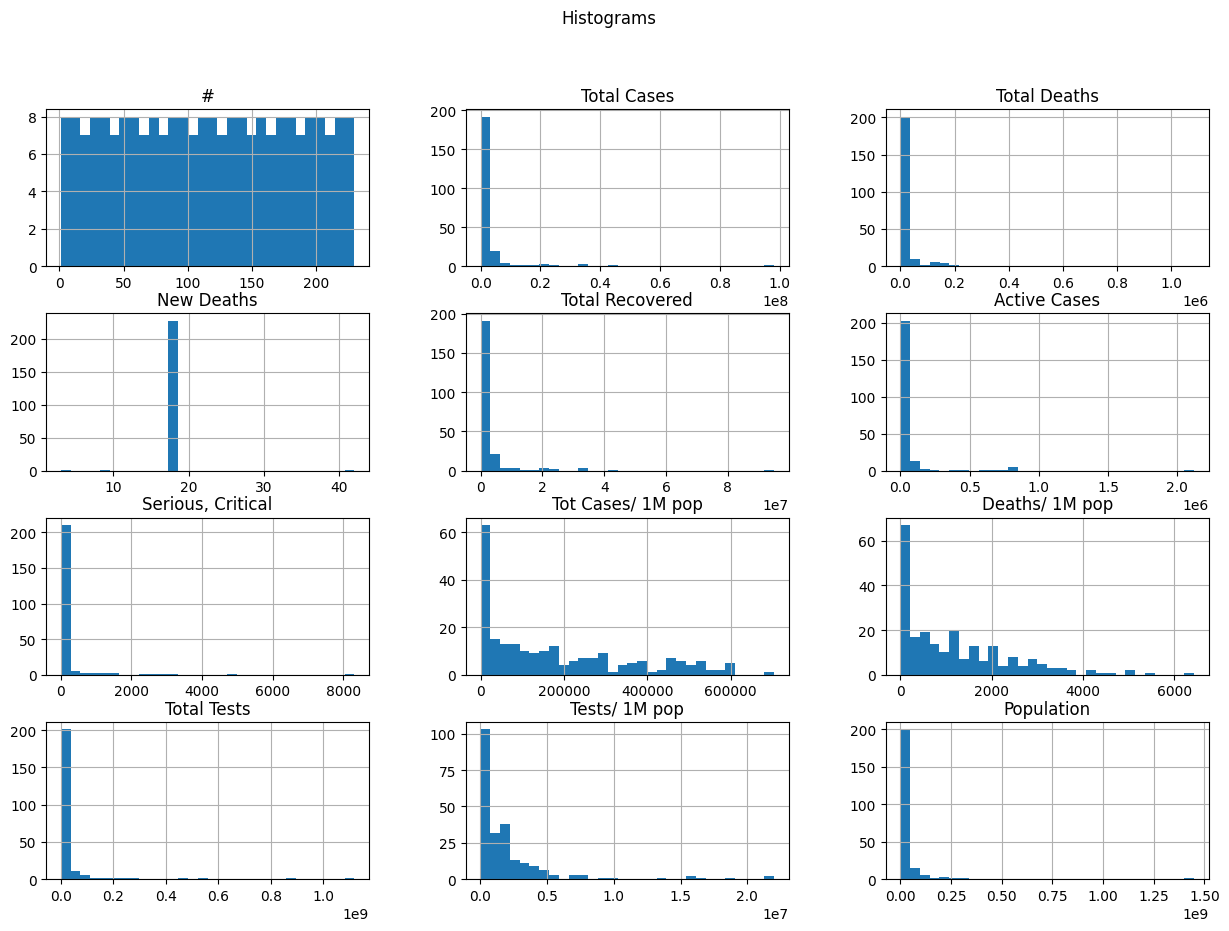

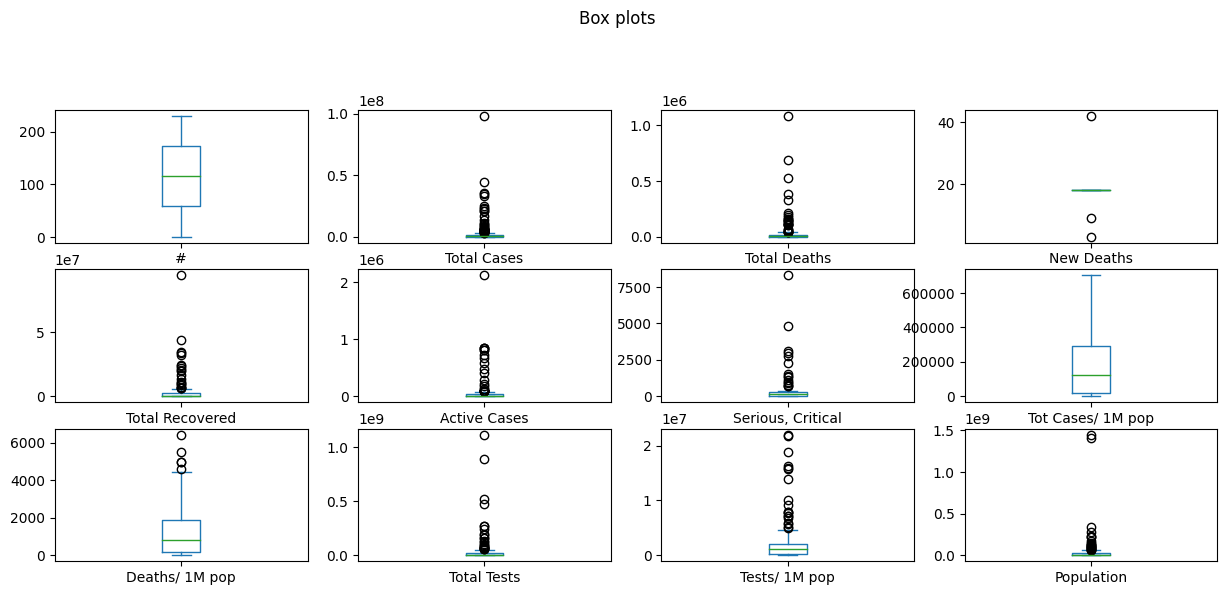

After handling outliers:


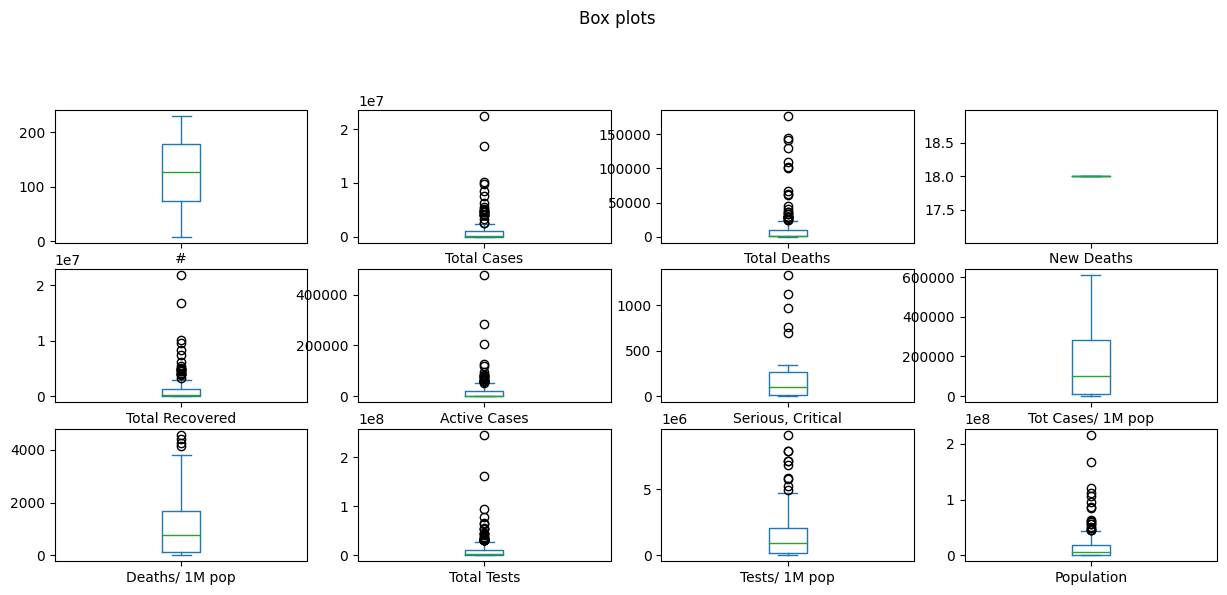

In [26]:
#master function
def process_data(file_path, outlier_method='zscore', outlier_threshold=3):
    df = load_data(file_path)
    df = clean_data(df)
    df = handle_missing_values(df, strategy='mean')
    #print(df.isna().any())    #check if still any missing value?
    perform_eda(df)
    #print (df)
    #print(df.shape)

    df_processed = handle_outliers(df, method='zscore', threshold=3)
    return df



df_processed = process_data('/content/drive/MyDrive/web3gle/Task1/Covid Live.csv')  # Replace 'data.csv' with the actual file name

# Display the processed DataFrame
#df_processed.head()